In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset_sudeste_simples_realista_outliers-2K.csv")

In [3]:
df['feedback'] = df['feedback'].fillna("Desconhecido")

In [4]:
df['feedback_Bom'] = (df['feedback'] == 'Bom').astype(int)

In [5]:
df.head(5)

,id,idade,renda,cidade,categoria,nota,feedback,feedback_Bom
0,1,25.0,8861.10,São Paulo,A,5.5,Regular,0
1,2,31.0,4553.40,Belo Horizonte,B,8.4,Regular,0
2,3,48.0,8259.38,Rio de Janeiro,B,6.9,Regular,0
3,4,37.0,10690.56,Rio de Janeiro,A,5.7,Bom,1
4,5,48.0,9732.75,Rio de Janeiro,A,9.2,Bom,1


In [6]:
df['feedback'] = df['feedback'].fillna("Desconhecido")
df['categoria'] = df['categoria'].fillna("Desconhecido")
df['idade'] = df['idade'].fillna(df['idade'].median())
df['renda'] = df['renda'].fillna(df['renda'].mean())
df['nota']  = df['nota'].fillna(df['nota'].median())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2000 non-null   int64  
 1   idade         2000 non-null   float64
 2   renda         2000 non-null   float64
 3   cidade        1988 non-null   object 
 4   categoria     2000 non-null   object 
 5   nota          2000 non-null   float64
 6   feedback      2000 non-null   object 
 7   feedback_Bom  2000 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 125.1+ KB


In [8]:
df.isnull().sum()

id               0
idade            0
renda            0
cidade          12
categoria        0
nota             0
feedback         0
feedback_Bom     0
dtype: int64

In [9]:
df.to_csv("dataset_tratado_sudeste_simples_realista_outliers-2K-pytorch.csv")

In [10]:
features = df[['idade', 'renda', 'nota']]
target   = df['feedback_Bom']

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.3, random_state=42)

In [11]:
target.head(5)

0    0
1    0
2    0
3    1
4    1
Name: feedback_Bom, dtype: int64

In [12]:
X_test.head(5)

,idade,renda,nota
1860,35.0,12191.43,0.1
353,55.0,6656.20,3.5
1333,54.0,12398.26,3.2
905,56.0,10975.14,0.8
1289,52.0,1698.48,1.3


In [13]:
y_test.head(5)

1860    0
353     0
1333    0
905     0
1289    0
Name: feedback_Bom, dtype: int64

In [14]:
X_train_t = torch.tensor(X_train.values, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_t = torch.tensor(X_test.values, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [15]:
print(X_train_t.shape) 
print(y_train_t.shape) 

torch.Size([1400, 3])
torch.Size([1400, 1])


In [16]:
print(X_train_t) 

tensor([[ 4.2000e+01,  2.5711e+03,  3.2000e+00],
        [ 5.2000e+01,  5.1126e+03,  5.0000e-01],
        [ 6.4000e+01,  1.1781e+04,  1.3000e+00],
        ...,
        [ 5.8000e+01,  8.3671e+03,  7.9000e+00],
        [ 4.0000e+00,  4.8082e+04, -3.9000e+00],
        [ 3.4000e+01,  1.2479e+04,  2.8000e+00]])


In [17]:
print(y_train_t) 

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [1.],
        [1.]])


In [18]:
print(X_test_t)

tensor([[3.5000e+01, 1.2191e+04, 1.0000e-01],
        [5.5000e+01, 6.6562e+03, 3.5000e+00],
        [5.4000e+01, 1.2398e+04, 3.2000e+00],
        ...,
        [6.0000e+01, 1.1302e+04, 5.7000e+00],
        [1.9000e+01, 1.8765e+03, 5.0000e+00],
        [6.3000e+01, 7.9136e+03, 6.8000e+00]])


In [19]:
print(y_test_t)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [20]:
class SimpleNet(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNet, self).__init__()
        self.linear1 = nn.Linear(input_dim, 8)
        self.relu    = nn.ReLU()
        self.linear2 = nn.Linear(8, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [21]:
input_dim = X_train_t.shape[1]  # Quantidade de colunas em X
model = SimpleNet(input_dim)

In [22]:
print (input_dim)

3


In [23]:
print(model)

SimpleNet(
  (linear1): Linear(in_features=3, out_features=8, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=8, out_features=1, bias=True)
)


In [24]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [25]:
# Qt de fases de treinamenro
epochs = 100
# Lista para guardar o valor da loss em cada época
losses = []  

for epoch in range(epochs):
    # forward
    ## faz a predição com base nos dados de entrada
    outputs = model(X_train_t)
    ## compara essas previsões com os verdadeiros rótulos (y_train_t) e calcula o erro (loss)
    loss = criterion(outputs, y_train_t)

    # backward
    ## Zera os gradientes acumulados nas etapas anteriores
    ## Se não zerar, os gradientes vão se somar e causar atualizações erradas nos pesos
    optimizer.zero_grad()

    ## Faz o cálculo dos gradientes de erro em relação aos pesos do modelo
    ## É o coração do backpropagation    
    loss.backward()

    ## Usa os gradientes calculados para atualizar os pesos do modelo
    ## O otimizador (Adam, neste caso) decide como ajustar os pesos
    optimizer.step()

    # Armazenar loss
    losses.append(loss.item())

    # imprimir estatísticas
    if (epoch+1) % 2 == 0:
        print(f"Época [{epoch+1}/{epochs}], Perda Treino: {loss.item():.4f}")



Época [2/100], Perda Treino: 63.8068
Época [4/100], Perda Treino: 51.7309
Época [6/100], Perda Treino: 39.7473
Época [8/100], Perda Treino: 22.6073
Época [10/100], Perda Treino: 43.8970
Época [12/100], Perda Treino: 41.0597
Época [14/100], Perda Treino: 21.1835
Época [16/100], Perda Treino: 21.5073
Época [18/100], Perda Treino: 30.8403
Época [20/100], Perda Treino: 7.3750
Época [22/100], Perda Treino: 21.7727
Época [24/100], Perda Treino: 20.1304
Época [26/100], Perda Treino: 5.6017
Época [28/100], Perda Treino: 17.5684
Época [30/100], Perda Treino: 3.9775
Época [32/100], Perda Treino: 10.8126
Época [34/100], Perda Treino: 4.1198
Época [36/100], Perda Treino: 7.9111
Época [38/100], Perda Treino: 3.9687
Época [40/100], Perda Treino: 2.3949
Época [42/100], Perda Treino: 0.8625
Época [44/100], Perda Treino: 2.5079
Época [46/100], Perda Treino: 0.9183
Época [48/100], Perda Treino: 2.5155
Época [50/100], Perda Treino: 10.8198
Época [52/100], Perda Treino: 8.6545
Época [54/100], Perda Treino

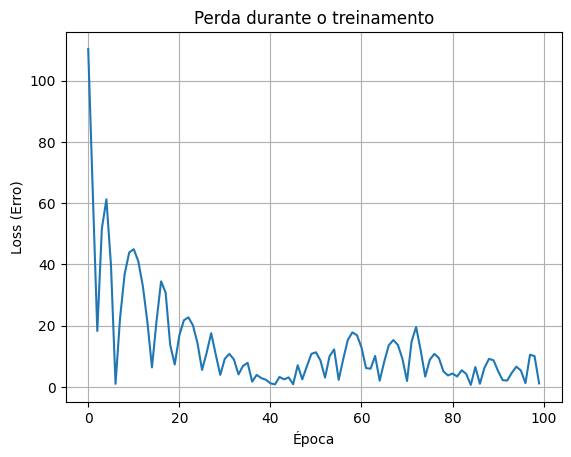

In [26]:
# ----------------------------------------------------------
# 8) GERAR GRÁFICO DA PERDA AO LONGO DAS ÉPOCAS
# ----------------------------------------------------------
plt.plot(losses)
plt.title("Perda durante o treinamento")
plt.xlabel("Época")
plt.ylabel("Loss (Erro)")
plt.grid(True)
plt.show()

In [27]:
with torch.no_grad():
    logits_test = model(X_test_t)
    
    # Transformar logits em probabilidades [0..1]
    probs_test = torch.sigmoid(logits_test)

    # prob > 0.5 => classe = 1 (Bom)
    preds_test = (probs_test > 0.5).float()

    acertos = (preds_test == y_test_t).sum().item()
    total = y_test_t.shape[0]
    acuracia_test = acertos / total * 100.0

print(f"Qtde de Elementos: {total:-6.2f}")
print(f"Qtde de Acertos: {acertos:-6.2f}")
print(f"Acurácia no teste: {acuracia_test:-6.2f}%")

Qtde de Elementos: 600.00
Qtde de Acertos: 430.00
Acurácia no teste:  71.67%


In [28]:
# Qt de fases de treinamenro
epochs = 1000
# Lista para guardar o valor da loss em cada época
losses = []  

for epoch in range(epochs):
    # forward
    ## faz a predição com base nos dados de entrada
    outputs = model(X_train_t)
    ## compara essas previsões com os verdadeiros rótulos (y_train_t) e calcula o erro (loss)
    loss = criterion(outputs, y_train_t)

    # backward
    ## Zera os gradientes acumulados nas etapas anteriores
    ## Se não zerar, os gradientes vão se somar e causar atualizações erradas nos pesos
    optimizer.zero_grad()

    ## Faz o cálculo dos gradientes de erro em relação aos pesos do modelo
    ## É o coração do backpropagation    
    loss.backward()

    ## Usa os gradientes calculados para atualizar os pesos do modelo
    ## O otimizador (Adam, neste caso) decide como ajustar os pesos
    optimizer.step()

    # Armazenar loss
    losses.append(loss.item())

    # imprimir estatísticas
    if (epoch+1) % 10 == 0:
        print(f"Época [{epoch+1}/{epochs}], Perda Treino: {loss.item():.4f}")

Época [10/1000], Perda Treino: 2.9509
Época [20/1000], Perda Treino: 5.8280
Época [30/1000], Perda Treino: 19.8491
Época [40/1000], Perda Treino: 5.1708
Época [50/1000], Perda Treino: 8.8805
Época [60/1000], Perda Treino: 7.6174
Época [70/1000], Perda Treino: 2.9330
Época [80/1000], Perda Treino: 4.8633
Época [90/1000], Perda Treino: 4.4632
Época [100/1000], Perda Treino: 1.4669
Época [110/1000], Perda Treino: 6.4473
Época [120/1000], Perda Treino: 5.9036
Época [130/1000], Perda Treino: 0.8401
Época [140/1000], Perda Treino: 7.0456
Época [150/1000], Perda Treino: 8.3000
Época [160/1000], Perda Treino: 1.7941
Época [170/1000], Perda Treino: 4.9223
Época [180/1000], Perda Treino: 7.0330
Época [190/1000], Perda Treino: 1.0783
Época [200/1000], Perda Treino: 5.1905
Época [210/1000], Perda Treino: 7.5748
Época [220/1000], Perda Treino: 1.2945
Época [230/1000], Perda Treino: 5.1678
Época [240/1000], Perda Treino: 7.7039
Época [250/1000], Perda Treino: 1.5014
Época [260/1000], Perda Treino: 4

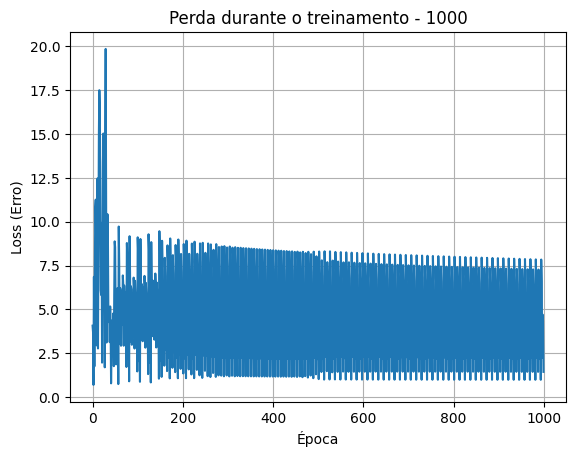

In [29]:
# ----------------------------------------------------------
# 8) GERAR GRÁFICO DA PERDA AO LONGO DAS ÉPOCAS
# ----------------------------------------------------------
plt.plot(losses)
plt.title("Perda durante o treinamento - 1000")
plt.xlabel("Época")
plt.ylabel("Loss (Erro)")
plt.grid(True)
plt.show()

In [30]:
with torch.no_grad():
    logits_test = model(X_test_t)
    
    # Transformar logits em probabilidades [0..1]
    probs_test = torch.sigmoid(logits_test)

    # prob > 0.5 => classe = 1 (Bom)
    preds_test = (probs_test > 0.5).float()

    acertos = (preds_test == y_test_t).sum().item()
    total = y_test_t.shape[0]
    acuracia_test = acertos / total * 100.0

print(f"Qtde de Elementos: {total:-6.2f}")
print(f"Qtde de Acertos: {acertos:-6.2f}")
print(f"Acurácia no teste: {acuracia_test:-6.2f}%")

Qtde de Elementos: 600.00
Qtde de Acertos: 172.00
Acurácia no teste:  28.67%


In [31]:
# Qt de fases de treinamenro
epochs = 2000
# Lista para guardar o valor da loss em cada época
losses = []  

for epoch in range(epochs):
    # forward
    ## faz a predição com base nos dados de entrada
    outputs = model(X_train_t)
    ## compara essas previsões com os verdadeiros rótulos (y_train_t) e calcula o erro (loss)
    loss = criterion(outputs, y_train_t)

    # backward
    ## Zera os gradientes acumulados nas etapas anteriores
    ## Se não zerar, os gradientes vão se somar e causar atualizações erradas nos pesos
    optimizer.zero_grad()

    ## Faz o cálculo dos gradientes de erro em relação aos pesos do modelo
    ## É o coração do backpropagation    
    loss.backward()

    ## Usa os gradientes calculados para atualizar os pesos do modelo
    ## O otimizador (Adam, neste caso) decide como ajustar os pesos
    optimizer.step()

    # Armazenar loss
    losses.append(loss.item())

    # imprimir estatísticas
    if (epoch+1) % 100 == 0:
        print(f"Época [{epoch+1}/{epochs}], Perda Treino: {loss.item():.4f}")

Época [100/2000], Perda Treino: 4.4448
Época [200/2000], Perda Treino: 6.4676
Época [300/2000], Perda Treino: 1.4114
Época [400/2000], Perda Treino: 4.3506
Época [500/2000], Perda Treino: 6.2688
Época [600/2000], Perda Treino: 1.3789
Época [700/2000], Perda Treino: 4.2591
Época [800/2000], Perda Treino: 6.0734
Época [900/2000], Perda Treino: 1.3461
Época [1000/2000], Perda Treino: 4.1698
Época [1100/2000], Perda Treino: 5.8802
Época [1200/2000], Perda Treino: 1.3139
Época [1300/2000], Perda Treino: 4.0824
Época [1400/2000], Perda Treino: 5.6886
Época [1500/2000], Perda Treino: 1.2815
Época [1600/2000], Perda Treino: 3.9967
Época [1700/2000], Perda Treino: 5.4974
Época [1800/2000], Perda Treino: 1.2485
Época [1900/2000], Perda Treino: 3.9126
Época [2000/2000], Perda Treino: 5.3059


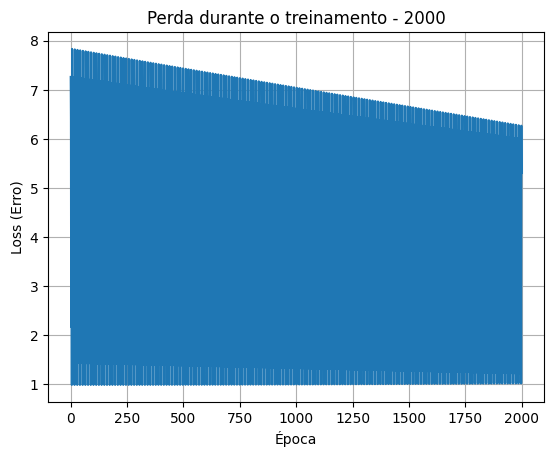

In [32]:
# ----------------------------------------------------------
# 8) GERAR GRÁFICO DA PERDA AO LONGO DAS ÉPOCAS
# ----------------------------------------------------------
plt.plot(losses)
plt.title("Perda durante o treinamento - 2000")
plt.xlabel("Época")
plt.ylabel("Loss (Erro)")
plt.grid(True)
plt.show()

In [33]:
with torch.no_grad():
    logits_test = model(X_test_t)
    
    # Transformar logits em probabilidades [0..1]
    probs_test = torch.sigmoid(logits_test)

    # prob > 0.5 => classe = 1 (Bom)
    preds_test = (probs_test > 0.5).float()

    acertos = (preds_test == y_test_t).sum().item()
    total = y_test_t.shape[0]
    acuracia_test = acertos / total * 100.0

print(f"Qtde de Elementos: {total:-6.2f}")
print(f"Qtde de Acertos: {acertos:-6.2f}")
print(f"Acurácia no teste: {acuracia_test:-6.2f}%")

Qtde de Elementos: 600.00
Qtde de Acertos: 430.00
Acurácia no teste:  71.67%


In [34]:
# Qt de fases de treinamenro
epochs = 4000
# Lista para guardar o valor da loss em cada época
losses = []  

for epoch in range(epochs):
    # forward
    ## faz a predição com base nos dados de entrada
    outputs = model(X_train_t)
    ## compara essas previsões com os verdadeiros rótulos (y_train_t) e calcula o erro (loss)
    loss = criterion(outputs, y_train_t)

    # backward
    ## Zera os gradientes acumulados nas etapas anteriores
    ## Se não zerar, os gradientes vão se somar e causar atualizações erradas nos pesos
    optimizer.zero_grad()

    ## Faz o cálculo dos gradientes de erro em relação aos pesos do modelo
    ## É o coração do backpropagation    
    loss.backward()

    ## Usa os gradientes calculados para atualizar os pesos do modelo
    ## O otimizador (Adam, neste caso) decide como ajustar os pesos
    optimizer.step()

    # Armazenar loss
    losses.append(loss.item())

    # imprimir estatísticas
    if (epoch+1) % 160 == 0:
        print(f"Época [{epoch+1}/{epochs}], Perda Treino: {loss.item():.4f}")

Época [160/4000], Perda Treino: 1.2081
Época [320/4000], Perda Treino: 3.7969
Época [480/4000], Perda Treino: 4.9935
Época [640/4000], Perda Treino: 1.1675
Época [800/4000], Perda Treino: 3.6604
Época [960/4000], Perda Treino: 4.6789
Época [1120/4000], Perda Treino: 1.1513
Época [1280/4000], Perda Treino: 3.5032
Época [1440/4000], Perda Treino: 4.3503
Época [1600/4000], Perda Treino: 1.2910
Época [1760/4000], Perda Treino: 3.3496
Época [1920/4000], Perda Treino: 3.9585
Época [2080/4000], Perda Treino: 1.5028
Época [2240/4000], Perda Treino: 3.2330
Época [2400/4000], Perda Treino: 0.9909
Época [2560/4000], Perda Treino: 1.0240
Época [2720/4000], Perda Treino: 0.8741
Época [2880/4000], Perda Treino: 0.9441
Época [3040/4000], Perda Treino: 1.1836
Época [3200/4000], Perda Treino: 1.0443
Época [3360/4000], Perda Treino: 0.9761
Época [3520/4000], Perda Treino: 1.6394
Época [3680/4000], Perda Treino: 1.0355
Época [3840/4000], Perda Treino: 0.9678
Época [4000/4000], Perda Treino: 1.6113


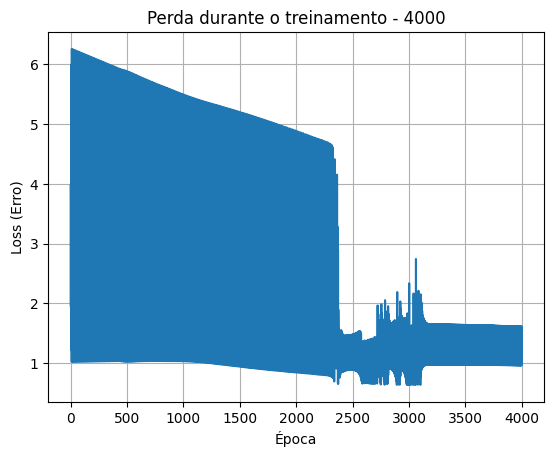

In [35]:
# ----------------------------------------------------------
# 8) GERAR GRÁFICO DA PERDA AO LONGO DAS ÉPOCAS
# ----------------------------------------------------------
plt.plot(losses)
plt.title("Perda durante o treinamento - 4000")
plt.xlabel("Época")
plt.ylabel("Loss (Erro)")
plt.grid(True)
plt.show()

In [36]:
with torch.no_grad():
    logits_test = model(X_test_t)
    
    # Transformar logits em probabilidades [0..1]
    probs_test = torch.sigmoid(logits_test)

    # prob > 0.5 => classe = 1 (Bom)
    preds_test = (probs_test > 0.5).float()

    acertos = (preds_test == y_test_t).sum().item()
    total = y_test_t.shape[0]
    acuracia_test = acertos / total * 100.0

print(f"Qtde de Elementos: {total:-6.2f}")
print(f"Qtde de Acertos: {acertos:-6.2f}")
print(f"Acurácia no teste: {acuracia_test:-6.2f}%")

Qtde de Elementos: 600.00
Qtde de Acertos: 430.00
Acurácia no teste:  71.67%


In [37]:
features = df[['idade']]
target   = df['feedback_Bom']

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.3, random_state=42)

In [38]:
# Qt de fases de treinamenro
epochs = 2000
# Lista para guardar o valor da loss em cada época
losses = []  

for epoch in range(epochs):
    # forward
    ## faz a predição com base nos dados de entrada
    outputs = model(X_train_t)
    ## compara essas previsões com os verdadeiros rótulos (y_train_t) e calcula o erro (loss)
    loss = criterion(outputs, y_train_t)

    # backward
    ## Zera os gradientes acumulados nas etapas anteriores
    ## Se não zerar, os gradientes vão se somar e causar atualizações erradas nos pesos
    optimizer.zero_grad()

    ## Faz o cálculo dos gradientes de erro em relação aos pesos do modelo
    ## É o coração do backpropagation    
    loss.backward()

    ## Usa os gradientes calculados para atualizar os pesos do modelo
    ## O otimizador (Adam, neste caso) decide como ajustar os pesos
    optimizer.step()

    # Armazenar loss
    losses.append(loss.item())

    # imprimir estatísticas
    if (epoch+1) % 100 == 0:
        print(f"Época [{epoch+1}/{epochs}], Perda Treino: {loss.item():.4f}")

Época [100/2000], Perda Treino: 1.0246
Época [200/2000], Perda Treino: 0.9586
Época [300/2000], Perda Treino: 1.5872
Época [400/2000], Perda Treino: 1.0152
Época [500/2000], Perda Treino: 0.9494
Época [600/2000], Perda Treino: 1.5581
Época [700/2000], Perda Treino: 1.0080
Época [800/2000], Perda Treino: 0.8391
Época [900/2000], Perda Treino: 1.4891
Época [1000/2000], Perda Treino: 0.7899
Época [1100/2000], Perda Treino: 0.6404
Época [1200/2000], Perda Treino: 1.4694
Época [1300/2000], Perda Treino: 1.4178
Época [1400/2000], Perda Treino: 0.8896
Época [1500/2000], Perda Treino: 1.0973
Época [1600/2000], Perda Treino: 0.7736
Época [1700/2000], Perda Treino: 0.8853
Época [1800/2000], Perda Treino: 1.2800
Época [1900/2000], Perda Treino: 0.7366
Época [2000/2000], Perda Treino: 1.1987


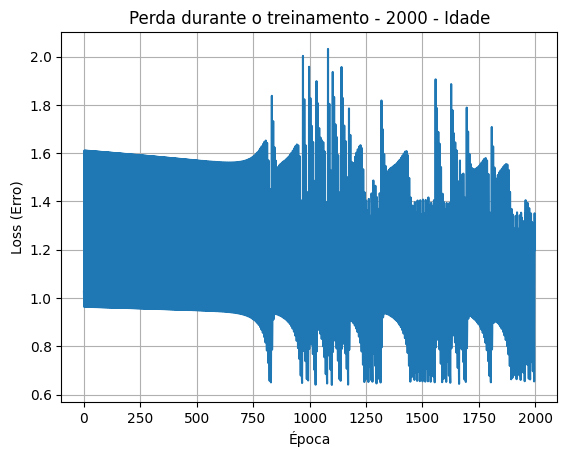

In [39]:
# ----------------------------------------------------------
# 8) GERAR GRÁFICO DA PERDA AO LONGO DAS ÉPOCAS
# ----------------------------------------------------------
plt.plot(losses)
plt.title("Perda durante o treinamento - 2000 - Idade")
plt.xlabel("Época")
plt.ylabel("Loss (Erro)")
plt.grid(True)
plt.show()

In [40]:
with torch.no_grad():
    logits_test = model(X_test_t)
    
    # Transformar logits em probabilidades [0..1]
    probs_test = torch.sigmoid(logits_test)

    # prob > 0.5 => classe = 1 (Bom)
    preds_test = (probs_test > 0.5).float()

    acertos = (preds_test == y_test_t).sum().item()
    total = y_test_t.shape[0]
    acuracia_test = acertos / total * 100.0

print(f"Qtde de Elementos: {total:-6.2f}")
print(f"Qtde de Acertos: {acertos:-6.2f}")
print(f"Acurácia no teste: {acuracia_test:-6.2f}%")

Qtde de Elementos: 600.00
Qtde de Acertos: 196.00
Acurácia no teste:  32.67%


In [41]:
features = df[['nota']]
target   = df['feedback_Bom']

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.3, random_state=42)

In [42]:
# Qt de fases de treinamenro
epochs = 2000
# Lista para guardar o valor da loss em cada época
losses = []  

for epoch in range(epochs):
    # forward
    ## faz a predição com base nos dados de entrada
    outputs = model(X_train_t)
    ## compara essas previsões com os verdadeiros rótulos (y_train_t) e calcula o erro (loss)
    loss = criterion(outputs, y_train_t)

    # backward
    ## Zera os gradientes acumulados nas etapas anteriores
    ## Se não zerar, os gradientes vão se somar e causar atualizações erradas nos pesos
    optimizer.zero_grad()

    ## Faz o cálculo dos gradientes de erro em relação aos pesos do modelo
    ## É o coração do backpropagation    
    loss.backward()

    ## Usa os gradientes calculados para atualizar os pesos do modelo
    ## O otimizador (Adam, neste caso) decide como ajustar os pesos
    optimizer.step()

    # Armazenar loss
    losses.append(loss.item())

    # imprimir estatísticas
    if (epoch+1) % 100 == 0:
        print(f"Época [{epoch+1}/{epochs}], Perda Treino: {loss.item():.4f}")

Época [100/2000], Perda Treino: 1.1424
Época [200/2000], Perda Treino: 0.7530
Época [300/2000], Perda Treino: 1.2872
Época [400/2000], Perda Treino: 1.1478
Época [500/2000], Perda Treino: 0.7545
Época [600/2000], Perda Treino: 1.2632
Época [700/2000], Perda Treino: 1.1664
Época [800/2000], Perda Treino: 0.7607
Época [900/2000], Perda Treino: 1.2099
Época [1000/2000], Perda Treino: 1.2085
Época [1100/2000], Perda Treino: 0.7809
Época [1200/2000], Perda Treino: 1.0924
Época [1300/2000], Perda Treino: 1.3141
Época [1400/2000], Perda Treino: 0.9081
Época [1500/2000], Perda Treino: 0.8588
Época [1600/2000], Perda Treino: 1.2844
Época [1700/2000], Perda Treino: 0.8943
Época [1800/2000], Perda Treino: 0.8375
Época [1900/2000], Perda Treino: 1.2301
Época [2000/2000], Perda Treino: 0.8740


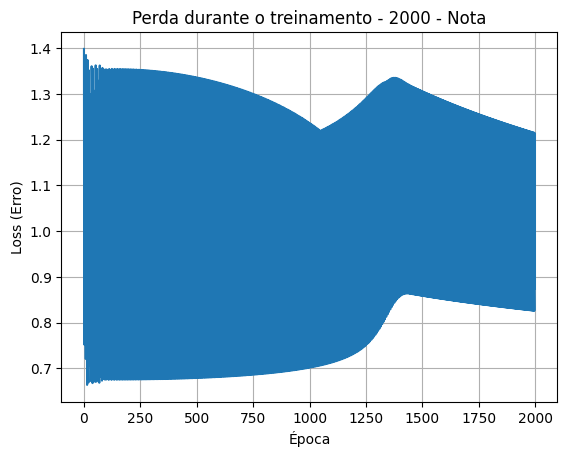

In [43]:
# ----------------------------------------------------------
# 8) GERAR GRÁFICO DA PERDA AO LONGO DAS ÉPOCAS
# ----------------------------------------------------------
plt.plot(losses)
plt.title("Perda durante o treinamento - 2000 - Nota")
plt.xlabel("Época")
plt.ylabel("Loss (Erro)")
plt.grid(True)
plt.show()

In [44]:
with torch.no_grad():
    logits_test = model(X_test_t)
    
    # Transformar logits em probabilidades [0..1]
    probs_test = torch.sigmoid(logits_test)

    # prob > 0.5 => classe = 1 (Bom)
    preds_test = (probs_test > 0.5).float()

    acertos = (preds_test == y_test_t).sum().item()
    total = y_test_t.shape[0]
    acuracia_test = acertos / total * 100.0

print(f"Qtde de Elementos: {total:-6.2f}")
print(f"Qtde de Acertos: {acertos:-6.2f}")
print(f"Acurácia no teste: {acuracia_test:-6.2f}%")

Qtde de Elementos: 600.00
Qtde de Acertos: 430.00
Acurácia no teste:  71.67%


In [45]:
features = df[['renda']]
target   = df['feedback_Bom']

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.3, random_state=42)

In [46]:
# Qt de fases de treinamenro
epochs = 2000
# Lista para guardar o valor da loss em cada época
losses = []  

for epoch in range(epochs):
    # forward
    ## faz a predição com base nos dados de entrada
    outputs = model(X_train_t)
    ## compara essas previsões com os verdadeiros rótulos (y_train_t) e calcula o erro (loss)
    loss = criterion(outputs, y_train_t)

    # backward
    ## Zera os gradientes acumulados nas etapas anteriores
    ## Se não zerar, os gradientes vão se somar e causar atualizações erradas nos pesos
    optimizer.zero_grad()

    ## Faz o cálculo dos gradientes de erro em relação aos pesos do modelo
    ## É o coração do backpropagation    
    loss.backward()

    ## Usa os gradientes calculados para atualizar os pesos do modelo
    ## O otimizador (Adam, neste caso) decide como ajustar os pesos
    optimizer.step()

    # Armazenar loss
    losses.append(loss.item())

    # imprimir estatísticas
    if (epoch+1) % 100 == 0:
        print(f"Época [{epoch+1}/{epochs}], Perda Treino: {loss.item():.4f}")

Época [100/2000], Perda Treino: 0.8205
Época [200/2000], Perda Treino: 1.1858
Época [300/2000], Perda Treino: 0.8568
Época [400/2000], Perda Treino: 0.8057
Época [500/2000], Perda Treino: 1.1472
Época [600/2000], Perda Treino: 0.8414
Época [700/2000], Perda Treino: 0.7924
Época [800/2000], Perda Treino: 1.1119
Época [900/2000], Perda Treino: 0.8270
Época [1000/2000], Perda Treino: 0.7799
Época [1100/2000], Perda Treino: 1.0784
Época [1200/2000], Perda Treino: 0.8134
Época [1300/2000], Perda Treino: 0.7681
Época [1400/2000], Perda Treino: 1.0461
Época [1500/2000], Perda Treino: 0.8002
Época [1600/2000], Perda Treino: 0.7566
Época [1700/2000], Perda Treino: 1.0147
Época [1800/2000], Perda Treino: 0.7873
Época [1900/2000], Perda Treino: 0.7455
Época [2000/2000], Perda Treino: 0.9842


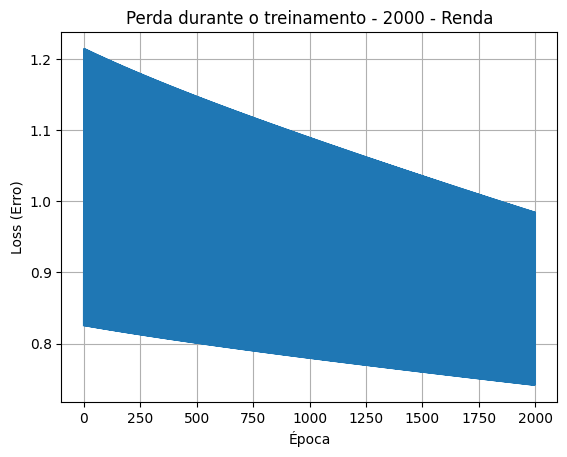

In [47]:
# ----------------------------------------------------------
# 8) GERAR GRÁFICO DA PERDA AO LONGO DAS ÉPOCAS
# ----------------------------------------------------------
plt.plot(losses)
plt.title("Perda durante o treinamento - 2000 - Renda")
plt.xlabel("Época")
plt.ylabel("Loss (Erro)")
plt.grid(True)
plt.show()

In [48]:
with torch.no_grad():
    logits_test = model(X_test_t)
    
    # Transformar logits em probabilidades [0..1]
    probs_test = torch.sigmoid(logits_test)

    # prob > 0.5 => classe = 1 (Bom)
    preds_test = (probs_test > 0.5).float()

    acertos = (preds_test == y_test_t).sum().item()
    total = y_test_t.shape[0]
    acuracia_test = acertos / total * 100.0

print(f"Qtde de Elementos: {total:-6.2f}")
print(f"Qtde de Acertos: {acertos:-6.2f}")
print(f"Acurácia no teste: {acuracia_test:-6.2f}%")

Qtde de Elementos: 600.00
Qtde de Acertos: 430.00
Acurácia no teste:  71.67%
